In [3]:
import scipy.ndimage
import psi4
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pickle

Data of "exact" energy from Oglvie, Wang, Journal of Molecular Structure, 213 (1992) 277-290.
$$
V(z) = c_0z^2(1+\sum_{j=1}c_j*z_j)
$$
where
$$
z=2\frac{R-R_e}{R+R_e}.
$$

In [8]:
# Constants
constant_bohr_to_m_10 = 5.29177249e-1 # 1 Bohr = 5.29177249e-11 meter
constant_m_1_to_hartree = 4.5563e-8 # 1 m^-1 = 4.5563e-8 Hartree
Re = 2.9695 # Equalibrium separation in 1e-10 m
De = 762.45 # Asymptotic value De in m^-1
c0 = 28844.2 # in m^-1
ci = np.array([-5.59024, 16.5131, -31.0814, 38.109, -28.088, 7.793, 5.287, -6.118, 2.366, -0.3429])

In [44]:
def He2bingind(R):
    Rb = R*constant_bohr_to_meter10
    z = 2*(Rb - Re)/(Rb + Re)
    V = 1
    for i in range(ci.shape[0]):
        V += ci[i]*z**(i+1)
    V *= c0*z**2
    
    # Minus the asymptotic value De
    V -= De
    
    # unit
    V *= constant_m_1_to_hartree
    return V

In [15]:
x = np.linspace(4,8)
x

array([4.        , 4.08163265, 4.16326531, 4.24489796, 4.32653061,
       4.40816327, 4.48979592, 4.57142857, 4.65306122, 4.73469388,
       4.81632653, 4.89795918, 4.97959184, 5.06122449, 5.14285714,
       5.2244898 , 5.30612245, 5.3877551 , 5.46938776, 5.55102041,
       5.63265306, 5.71428571, 5.79591837, 5.87755102, 5.95918367,
       6.04081633, 6.12244898, 6.20408163, 6.28571429, 6.36734694,
       6.44897959, 6.53061224, 6.6122449 , 6.69387755, 6.7755102 ,
       6.85714286, 6.93877551, 7.02040816, 7.10204082, 7.18367347,
       7.26530612, 7.34693878, 7.42857143, 7.51020408, 7.59183673,
       7.67346939, 7.75510204, 7.83673469, 7.91836735, 8.        ])

In [16]:
V = He2bingind(x)

<IPython.core.display.Javascript object>


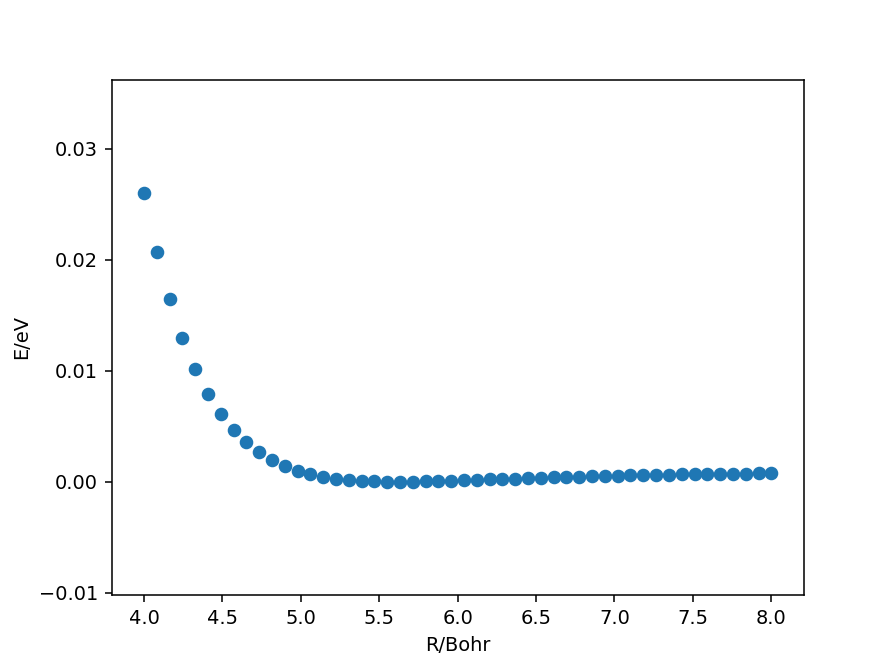

Text(0, 0.5, 'E/eV')

In [23]:
f,ax = plt.subplots(1,1)
ax.scatter(x, V*27)
ax.set_xlabel("R/Bohr")
ax.set_ylabel("E/eV")

In [38]:
psi4.set_options({
    'REFERENCE': 'UKS'
})
bondlength = 100
Full_Molec =  psi4.geometry("""
nocom
noreorient
He %f 0.0 0.00
He -%f 0.0 0.00
units bohr
symmetry c1
""" % (bondlength / 2, bondlength / 2))

E_asymptotic = psi4.energy("pbe/aug-cc-pvdz", molecule=Full_Molec)

<IPython.core.display.Javascript object>


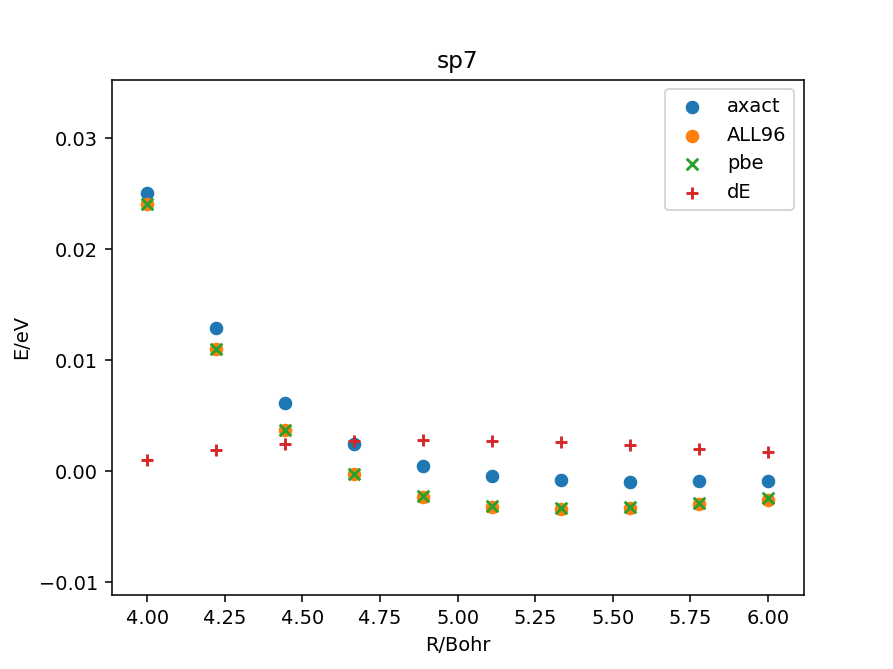

Text(0.5, 1.0, 'sp7')

In [52]:
data = pickle.load(open("He2Curve_sptest_lda+all96/save7.0.p", "rb"))
data.keys()

x = np.array(data['x'])
eall96 = np.array(data['y'])/2
epbe = np.array(data['pbeE'])/2

V_exact = He2bingind(x)

f,ax = plt.subplots(1,1)
ax.scatter(x, V_exact*27, label="axact")
ax.scatter(x, (epbe+eall96-E_asymptotic)*27, label="ALL96")
ax.scatter(x, (epbe-E_asymptotic)*27, label="pbe", marker="x")
ax.scatter(x, V_exact*27 - (epbe+eall96-E_asymptotic)*27, label="dE", marker="+")
ax.legend()
ax.set_xlabel("R/Bohr")
ax.set_ylabel("E/eV")
ax.set_title("sp7")

<IPython.core.display.Javascript object>


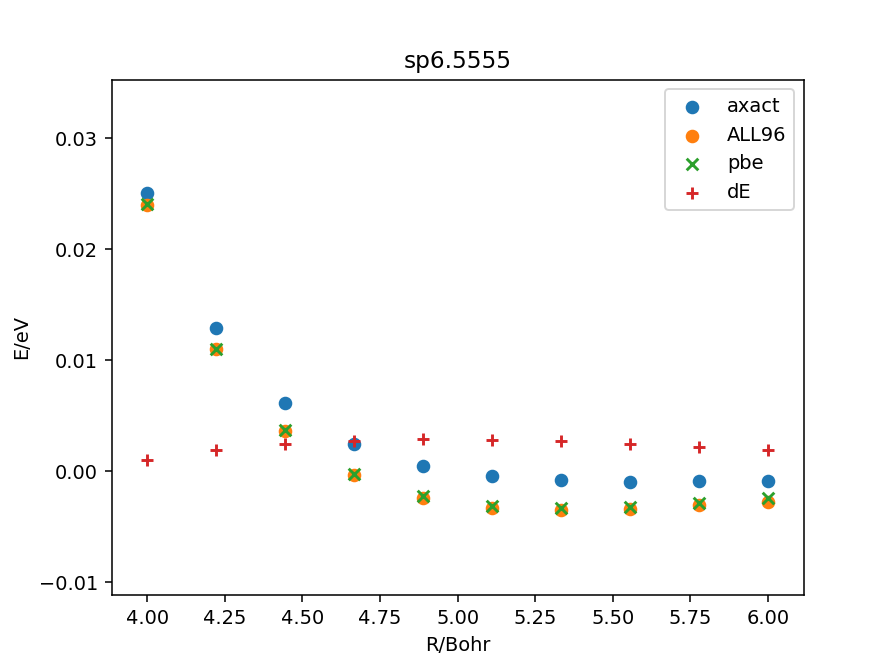

Text(0.5, 1.0, 'sp6.5555')

In [53]:
data = pickle.load(open("He2Curve_sptest_lda+all96/save6.555555555555555.p", "rb"))
data.keys()

x = np.array(data['x'])
eall96 = np.array(data['y'])/2
epbe = np.array(data['pbeE'])/2

V_exact = He2bingind(x)

f,ax = plt.subplots(1,1)
ax.scatter(x, V_exact*27, label="axact")
ax.scatter(x, (epbe+eall96-E_asymptotic)*27, label="ALL96")
ax.scatter(x, (epbe-E_asymptotic)*27, label="pbe", marker="x")
ax.scatter(x, V_exact*27 - (epbe+eall96-E_asymptotic)*27, label="dE", marker="+")
ax.legend()
ax.set_xlabel("R/Bohr")
ax.set_ylabel("E/eV")
ax.set_title("sp6.5555")

<IPython.core.display.Javascript object>


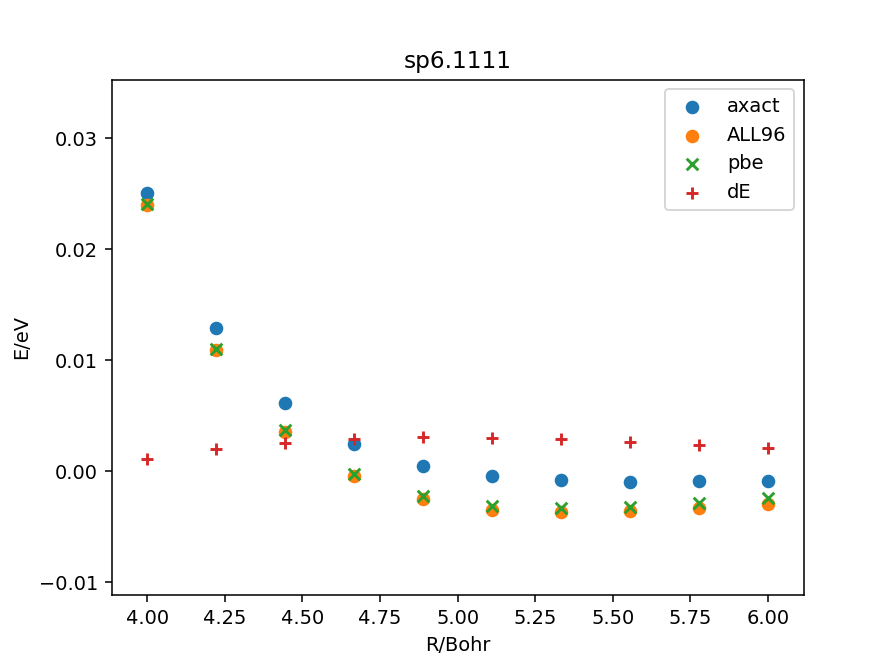

Text(0.5, 1.0, 'sp6.1111')

In [54]:
data = pickle.load(open("He2Curve_sptest_lda+all96/save6.111111111111111.p", "rb"))
data.keys()

x = np.array(data['x'])
eall96 = np.array(data['y'])/2
epbe = np.array(data['pbeE'])/2

V_exact = He2bingind(x)

f,ax = plt.subplots(1,1)
ax.scatter(x, V_exact*27, label="axact")
ax.scatter(x, (epbe+eall96-E_asymptotic)*27, label="ALL96")
ax.scatter(x, (epbe-E_asymptotic)*27, label="pbe", marker="x")
ax.scatter(x, V_exact*27 - (epbe+eall96-E_asymptotic)*27, label="dE", marker="+")
ax.legend()
ax.set_xlabel("R/Bohr")
ax.set_ylabel("E/eV")
ax.set_title("sp6.1111")

<IPython.core.display.Javascript object>


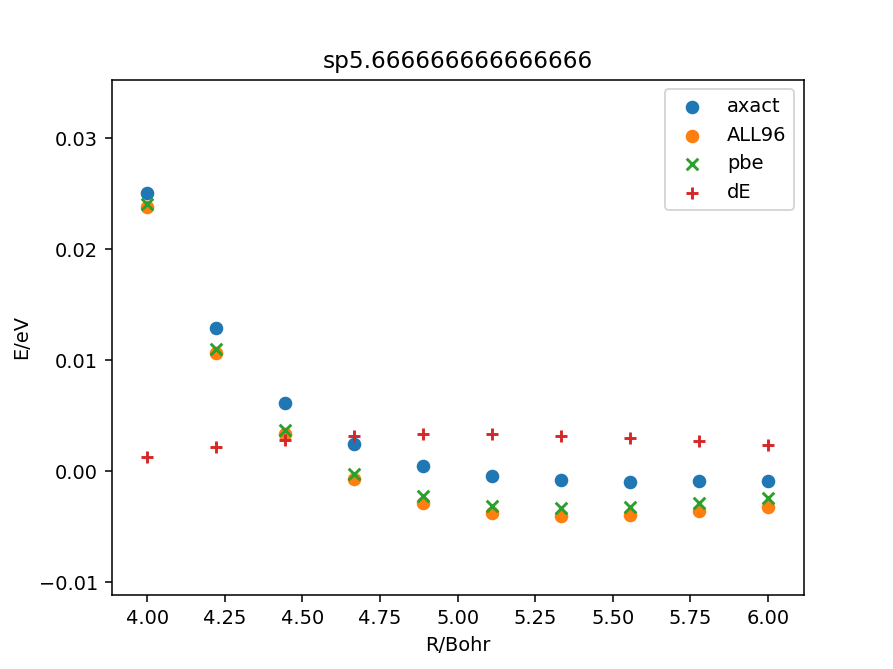

Text(0.5, 1.0, 'sp5.666666666666666')

In [55]:
data = pickle.load(open("He2Curve_sptest_lda+all96/save5.666666666666666.p", "rb"))
data.keys()

x = np.array(data['x'])
eall96 = np.array(data['y'])/2
epbe = np.array(data['pbeE'])/2

V_exact = He2bingind(x)

f,ax = plt.subplots(1,1)
ax.scatter(x, V_exact*27, label="axact")
ax.scatter(x, (epbe+eall96-E_asymptotic)*27, label="ALL96")
ax.scatter(x, (epbe-E_asymptotic)*27, label="pbe", marker="x")
ax.scatter(x, V_exact*27 - (epbe+eall96-E_asymptotic)*27, label="dE", marker="+")
ax.legend()
ax.set_xlabel("R/Bohr")
ax.set_ylabel("E/eV")
ax.set_title("sp5.666666666666666")

<IPython.core.display.Javascript object>


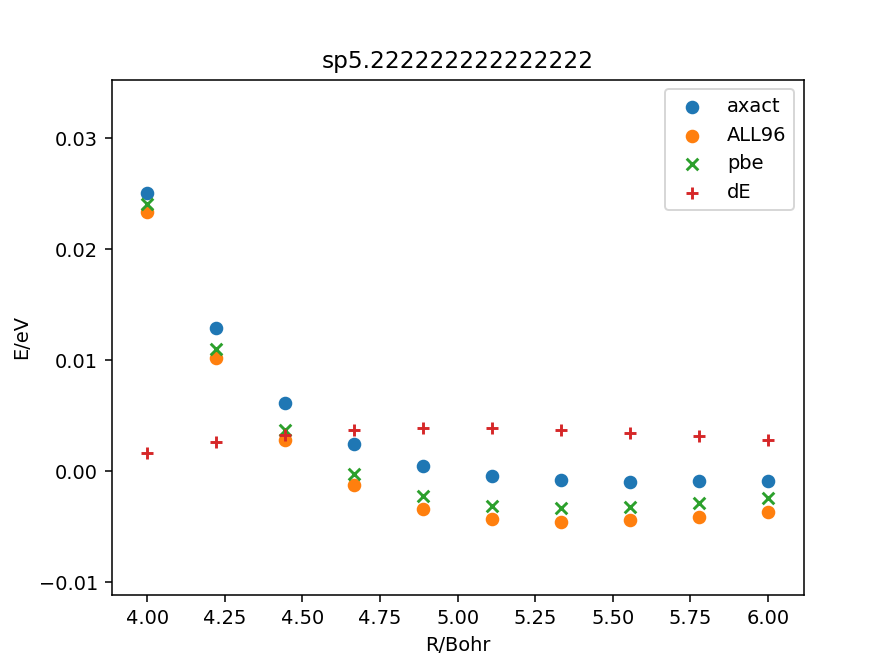

Text(0.5, 1.0, 'sp5.222222222222222')

In [56]:
data = pickle.load(open("He2Curve_sptest_lda+all96/save5.222222222222222.p", "rb"))
data.keys()

x = np.array(data['x'])
eall96 = np.array(data['y'])/2
epbe = np.array(data['pbeE'])/2

V_exact = He2bingind(x)

f,ax = plt.subplots(1,1)
ax.scatter(x, V_exact*27, label="axact")
ax.scatter(x, (epbe+eall96-E_asymptotic)*27, label="ALL96")
ax.scatter(x, (epbe-E_asymptotic)*27, label="pbe", marker="x")
ax.scatter(x, V_exact*27 - (epbe+eall96-E_asymptotic)*27, label="dE", marker="+")
ax.legend()
ax.set_xlabel("R/Bohr")
ax.set_ylabel("E/eV")
ax.set_title("sp5.222222222222222")

<IPython.core.display.Javascript object>


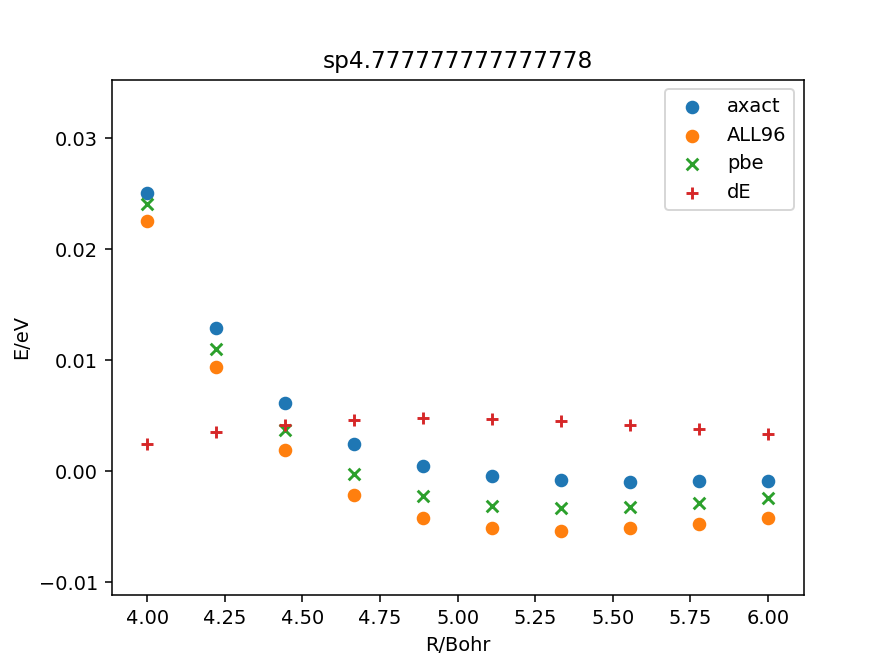

Text(0.5, 1.0, 'sp4.777777777777778')

In [57]:
data = pickle.load(open("He2Curve_sptest_lda+all96/save4.777777777777778.p", "rb"))
data.keys()

x = np.array(data['x'])
eall96 = np.array(data['y'])/2
epbe = np.array(data['pbeE'])/2

V_exact = He2bingind(x)

f,ax = plt.subplots(1,1)
ax.scatter(x, V_exact*27, label="axact")
ax.scatter(x, (epbe+eall96-E_asymptotic)*27, label="ALL96")
ax.scatter(x, (epbe-E_asymptotic)*27, label="pbe", marker="x")
ax.scatter(x, V_exact*27 - (epbe+eall96-E_asymptotic)*27, label="dE", marker="+")
ax.legend()
ax.set_xlabel("R/Bohr")
ax.set_ylabel("E/eV")
ax.set_title("sp4.777777777777778")

<IPython.core.display.Javascript object>


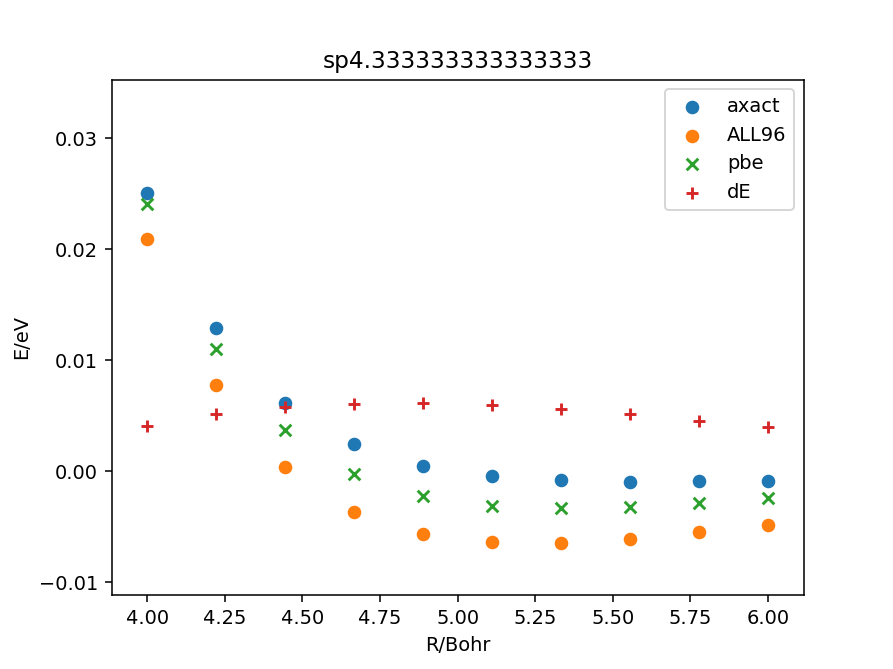

Text(0.5, 1.0, 'sp4.333333333333333')

In [58]:
data = pickle.load(open("He2Curve_sptest_lda+all96/save4.333333333333333.p", "rb"))
data.keys()

x = np.array(data['x'])
eall96 = np.array(data['y'])/2
epbe = np.array(data['pbeE'])/2

V_exact = He2bingind(x)

f,ax = plt.subplots(1,1)
ax.scatter(x, V_exact*27, label="axact")
ax.scatter(x, (epbe+eall96-E_asymptotic)*27, label="ALL96")
ax.scatter(x, (epbe-E_asymptotic)*27, label="pbe", marker="x")
ax.scatter(x, V_exact*27 - (epbe+eall96-E_asymptotic)*27, label="dE", marker="+")
ax.legend()
ax.set_xlabel("R/Bohr")
ax.set_ylabel("E/eV")
ax.set_title("sp4.333333333333333")

<IPython.core.display.Javascript object>


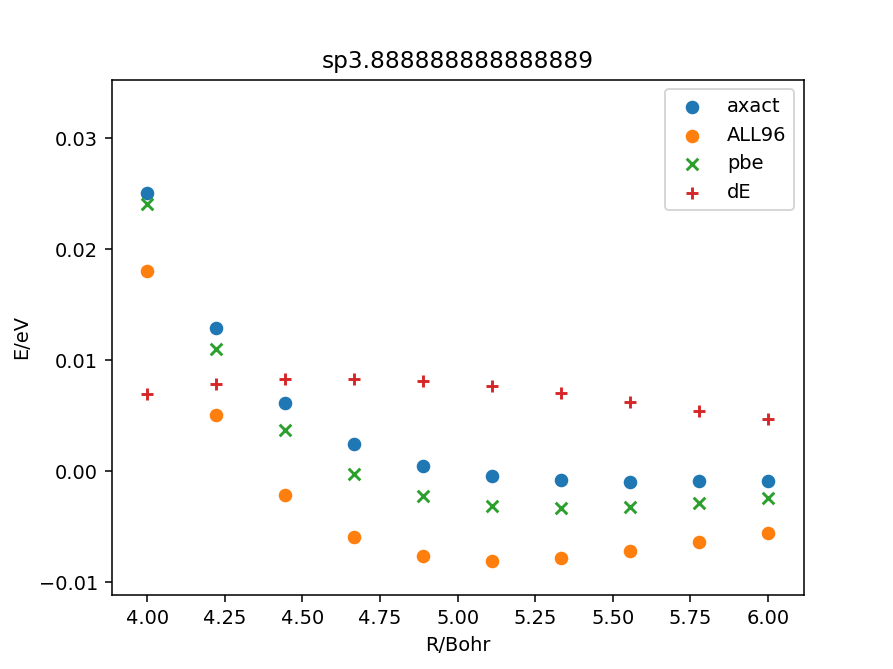

Text(0.5, 1.0, 'sp3.888888888888889')

In [59]:
data = pickle.load(open("He2Curve_sptest_lda+all96/save3.888888888888889.p", "rb"))
data.keys()

x = np.array(data['x'])
eall96 = np.array(data['y'])/2
epbe = np.array(data['pbeE'])/2

V_exact = He2bingind(x)

f,ax = plt.subplots(1,1)
ax.scatter(x, V_exact*27, label="axact")
ax.scatter(x, (epbe+eall96-E_asymptotic)*27, label="ALL96")
ax.scatter(x, (epbe-E_asymptotic)*27, label="pbe", marker="x")
ax.scatter(x, V_exact*27 - (epbe+eall96-E_asymptotic)*27, label="dE", marker="+")
ax.legend()
ax.set_xlabel("R/Bohr")
ax.set_ylabel("E/eV")
ax.set_title("sp3.888888888888889")

<IPython.core.display.Javascript object>


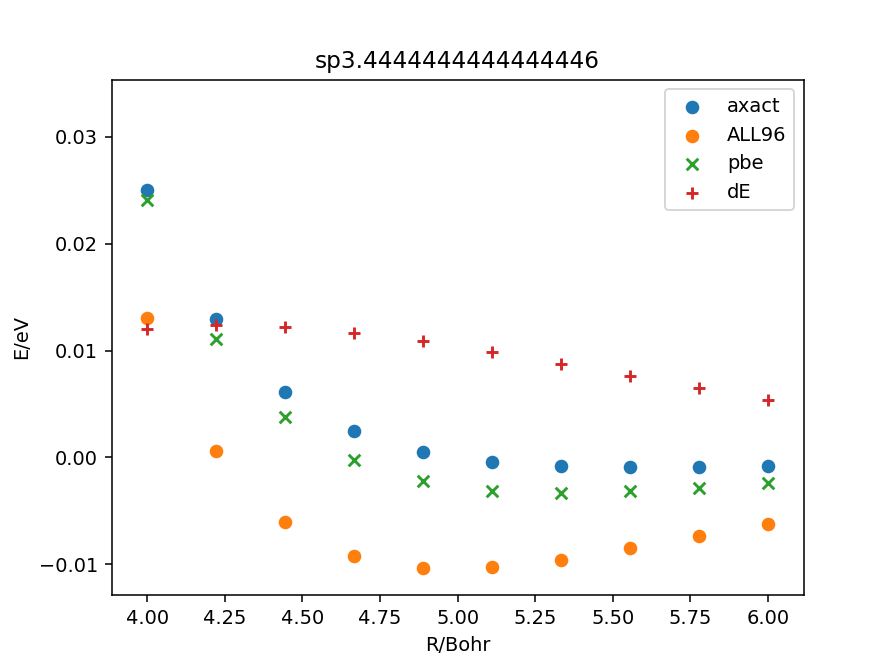

Text(0.5, 1.0, 'sp3.4444444444444446')

In [61]:
data = pickle.load(open("He2Curve_sptest_lda+all96/save3.4444444444444446.p", "rb"))
data.keys()

x = np.array(data['x'])
eall96 = np.array(data['y'])/2
epbe = np.array(data['pbeE'])/2

V_exact = He2bingind(x)

f,ax = plt.subplots(1,1)
ax.scatter(x, V_exact*27, label="axact")
ax.scatter(x, (epbe+eall96-E_asymptotic)*27, label="ALL96")
ax.scatter(x, (epbe-E_asymptotic)*27, label="pbe", marker="x")
ax.scatter(x, V_exact*27 - (epbe+eall96-E_asymptotic)*27, label="dE", marker="+")
ax.legend()
ax.set_xlabel("R/Bohr")
ax.set_ylabel("E/eV")
ax.set_title("sp3.4444444444444446")

<IPython.core.display.Javascript object>


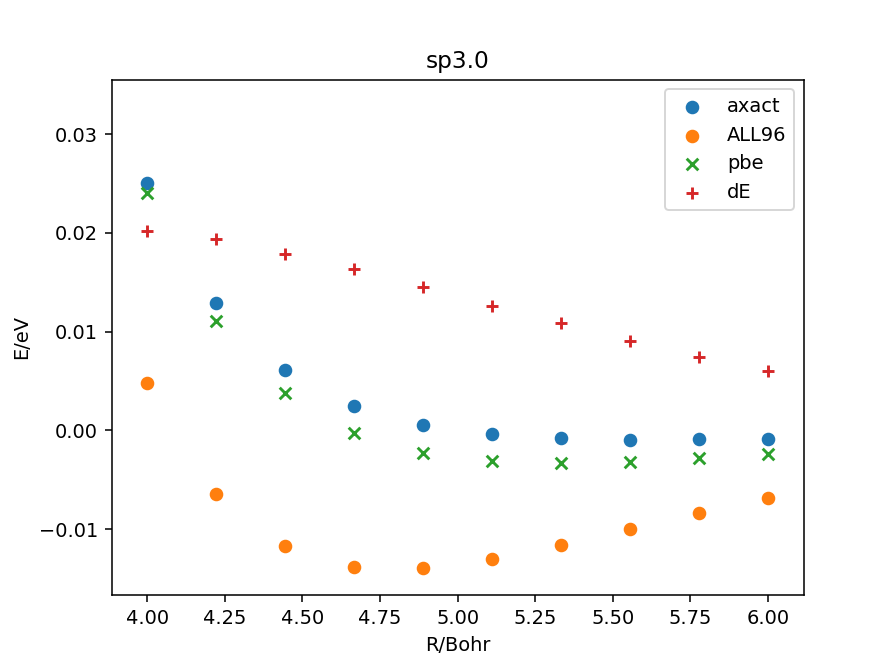

Text(0.5, 1.0, 'sp3.0')

In [62]:
data = pickle.load(open("He2Curve_sptest_lda+all96/save3.0.p", "rb"))
data.keys()

x = np.array(data['x'])
eall96 = np.array(data['y'])/2
epbe = np.array(data['pbeE'])/2

V_exact = He2bingind(x)

f,ax = plt.subplots(1,1)
ax.scatter(x, V_exact*27, label="axact")
ax.scatter(x, (epbe+eall96-E_asymptotic)*27, label="ALL96")
ax.scatter(x, (epbe-E_asymptotic)*27, label="pbe", marker="x")
ax.scatter(x, V_exact*27 - (epbe+eall96-E_asymptotic)*27, label="dE", marker="+")
ax.legend()
ax.set_xlabel("R/Bohr")
ax.set_ylabel("E/eV")
ax.set_title("sp3.0")

<IPython.core.display.Javascript object>


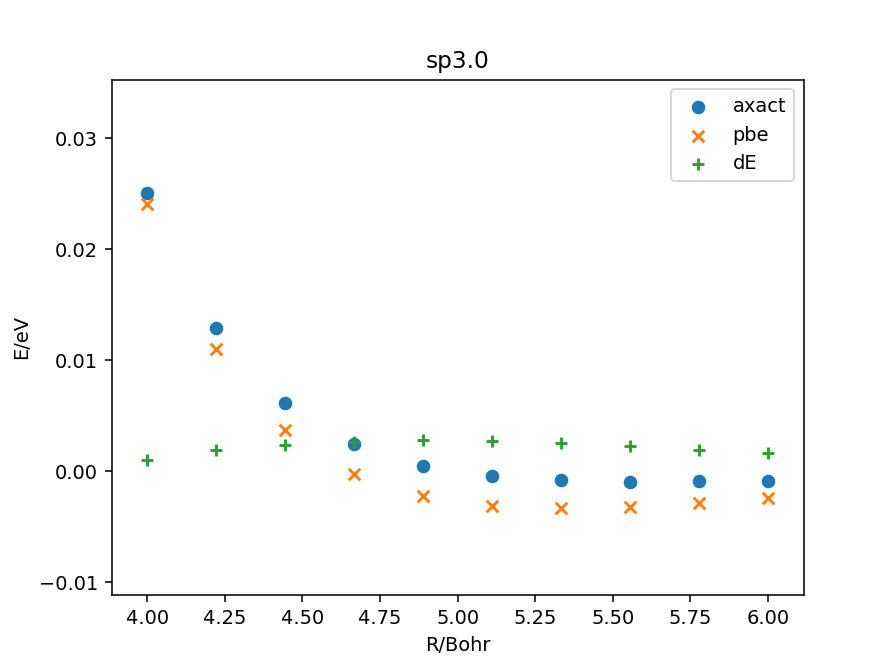

Text(0.5, 1.0, 'sp3.0')

In [72]:
energy_pbe = []

for bondlength in x:
    Full_Molec =  psi4.geometry("""
    nocom
    noreorient
    He %f 0.0 0.00
    He -%f 0.0 0.00
    units bohr
    symmetry c1
    """ % (bondlength / 2, bondlength / 2))

    E = psi4.energy("pbe/aug-cc-pvdz", molecule=Full_Molec)
    
    energy_pbe.append(E)

energy_pbe = np.array(energy_pbe)

V_exact = He2bingind(x)

f,ax = plt.subplots(1,1)
ax.scatter(x, V_exact*27, label="axact")
ax.scatter(x, (energy_pbe-E_asymptotic)*27, label="pbe", marker="x")
ax.scatter(x, V_exact*27 - (energy_pbe-E_asymptotic)*27, label="dE", marker="+")
ax.legend()
ax.set_xlabel("R/Bohr")
ax.set_ylabel("E/eV")
ax.set_title("sp3.0")

<IPython.core.display.Javascript object>


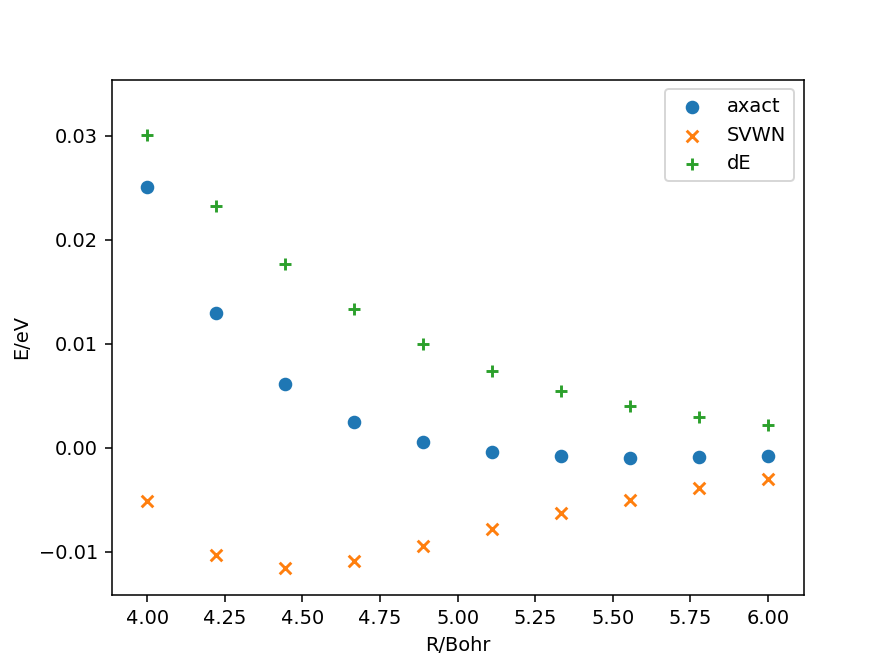

Text(0, 0.5, 'E/eV')

In [73]:
energy_SVWN = []

for bondlength in x:
    Full_Molec =  psi4.geometry("""
    nocom
    noreorient
    He %f 0.0 0.00
    He -%f 0.0 0.00
    units bohr
    symmetry c1
    """ % (bondlength / 2, bondlength / 2))

    E = psi4.energy("SVWN/aug-cc-pvdz", molecule=Full_Molec)
    
    energy_SVWN.append(E)

energy_SVWN = np.array(energy_SVWN)

psi4.set_options({
    'REFERENCE': 'UKS'
})
bondlength = 100
Full_Molec =  psi4.geometry("""
nocom
noreorient
He %f 0.0 0.00
He -%f 0.0 0.00
units bohr
symmetry c1
""" % (bondlength / 2, bondlength / 2))

E_asymptotic = psi4.energy("SVWN/aug-cc-pvdz", molecule=Full_Molec)

f,ax = plt.subplots(1,1)
ax.scatter(x, V_exact*27, label="axact")
ax.scatter(x, (energy_SVWN-E_asymptotic)*27, label="SVWN", marker="x")
ax.scatter(x, V_exact*27 - (energy_SVWN-E_asymptotic)*27, label="dE", marker="+")
ax.legend()
ax.set_xlabel("R/Bohr")
ax.set_ylabel("E/eV")

<IPython.core.display.Javascript object>


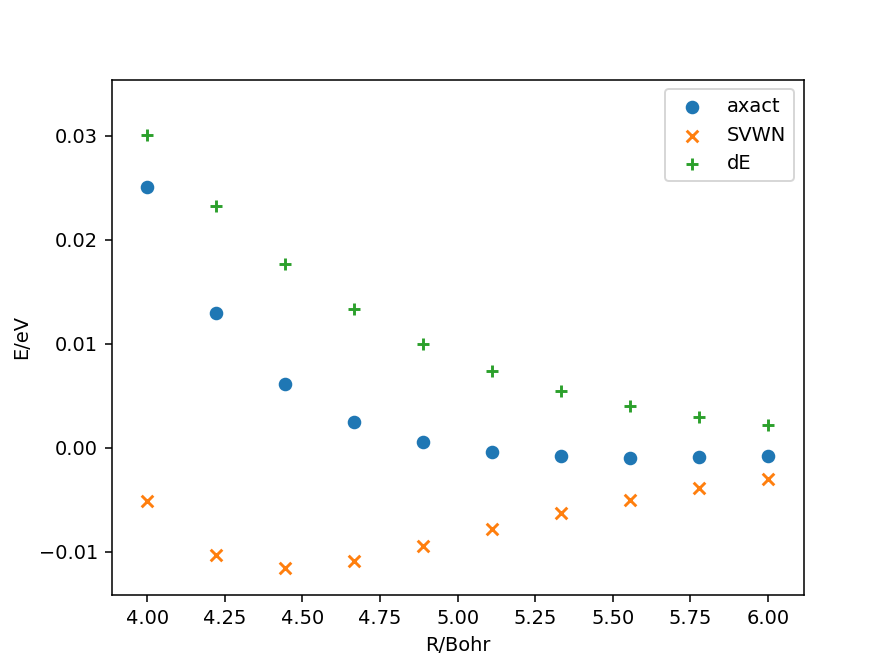

Text(0, 0.5, 'E/eV')

In [73]:
energy_SVWN = []

for bondlength in x:
    Full_Molec =  psi4.geometry("""
    nocom
    noreorient
    He %f 0.0 0.00
    He -%f 0.0 0.00
    units bohr
    symmetry c1
    """ % (bondlength / 2, bondlength / 2))

    E = psi4.energy("SVWN/aug-cc-pvdz", molecule=Full_Molec)
    
    energy_SVWN.append(E)

energy_SVWN = np.array(energy_SVWN)

psi4.set_options({
    'REFERENCE': 'UKS'
})
bondlength = 100
Full_Molec =  psi4.geometry("""
nocom
noreorient
He %f 0.0 0.00
He -%f 0.0 0.00
units bohr
symmetry c1
""" % (bondlength / 2, bondlength / 2))

E_asymptotic = psi4.energy("SVWN/aug-cc-pvdz", molecule=Full_Molec)

f,ax = plt.subplots(1,1)
ax.scatter(x, V_exact*27, label="axact")
ax.scatter(x, (energy_SVWN-E_asymptotic)*27, label="SVWN", marker="x")
ax.scatter(x, V_exact*27 - (energy_SVWN-E_asymptotic)*27, label="dE", marker="+")
ax.legend()
ax.set_xlabel("R/Bohr")
ax.set_ylabel("E/eV")

<IPython.core.display.Javascript object>


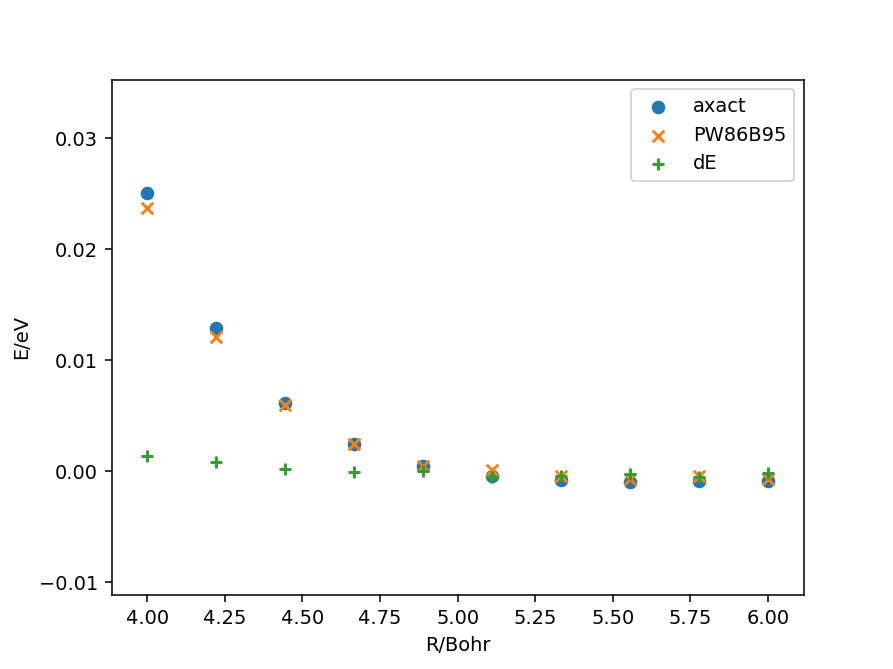

Text(0, 0.5, 'E/eV')

In [74]:
energy_PW86B95 = []

for bondlength in x:
    Full_Molec =  psi4.geometry("""
    nocom
    noreorient
    He %f 0.0 0.00
    He -%f 0.0 0.00
    units bohr
    symmetry c1
    """ % (bondlength / 2, bondlength / 2))

    E = psi4.energy("PW86B95/aug-cc-pvdz", molecule=Full_Molec)
    
    energy_PW86B95.append(E)

energy_PW86B95 = np.array(energy_PW86B95)

psi4.set_options({
    'REFERENCE': 'UKS'
})
bondlength = 100
Full_Molec =  psi4.geometry("""
nocom
noreorient
He %f 0.0 0.00
He -%f 0.0 0.00
units bohr
symmetry c1
""" % (bondlength / 2, bondlength / 2))

E_asymptotic = psi4.energy("PW86B95/aug-cc-pvdz", molecule=Full_Molec)

f,ax = plt.subplots(1,1)
ax.scatter(x, V_exact*27, label="axact")
ax.scatter(x, (energy_PW86B95-E_asymptotic)*27, label="PW86B95", marker="x")
ax.scatter(x, V_exact*27 - (energy_PW86B95-E_asymptotic)*27, label="dE", marker="+")
ax.legend()
ax.set_xlabel("R/Bohr")
ax.set_ylabel("E/eV")